# DATATHON ENTEL RETO 2 

<h3>Equipo: Insight ML</h3>
<div>
    <ul>
        <li>Renato Castro Cruz</li>
        <li>Cristian Lazo Quispe</li>
    </ul>
</div>


In [1]:
### Data Science Libraries ###
import pandas as pd
import numpy as np
import seaborn as sns

### OS and other Libraries ###
import inspect
import os
import datetime
import warnings
warnings.filterwarnings('ignore')
import random
import pickle

In [2]:
### READ DATASET TRAIN TEST ###
directory_path = ""# os.getcwd()


raw_train = pd.read_csv(os.path.join(directory_path, '../dataset/train/train.csv'))
raw_test = pd.read_csv(os.path.join(directory_path, '../dataset/test/test.csv'))

In [3]:
raw_train.head()

,Z_MARCA,Z_GAMA,Z_MODELO,Z_DEPARTAMENTO,Z_PUNTO_VENTA,SEMANA_01,SEMANA_02,SEMANA_03,SEMANA_04,SEMANA_05,...,SEMANA_41,SEMANA_42,SEMANA_43,SEMANA_44,SEMANA_45,SEMANA_46,SEMANA_47,SEMANA_48,SEMANA_49,SEMANA_50
0,f223faa96f22916294922b171a2696d868fd1f9129302e...,de88c121a82a06352bf1aaceba20578356408a334ba046...,f0465138ce3c092d78c1e33657fe604564d40cdc8cb196...,591c0a0133cb5fcd00af7bbf046f094256901239749fb7...,d2c888e1a77f2eb0732555cf018c3ca71bbcb32c73778c...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5132f94c2aebce767bd61d9e8f0d4f681d0809ca90cd2c...,76df0c6db32d4e04e0ef6a3a6a1e1686677e34308d9435...,85ac1d5351fa6c551dcaf4e9440939949f59fd6986c5ee...,d6c21b948958417ca98b682a573eb8aa1084b292d32f76...,99af5fbe4f1ce1a2d5c05d8d50543bb993dd621f259c8e...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,f223faa96f22916294922b171a2696d868fd1f9129302e...,de88c121a82a06352bf1aaceba20578356408a334ba046...,ab82a1d82b6fbd27ffe90900dffa4e8018745ef082fdf2...,d6c21b948958417ca98b682a573eb8aa1084b292d32f76...,4d9927f9d9ebe9b3742b20cf87b37b72c526f39d160289...,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,285075a02b2679248a6b4636c3328bd3097626607c3e43...,8563abec343968034b0624650aed7254081e9e39e6b32e...,3f7d19feb71e55fc12b796a4cda0fbcec00511a039e758...,d6c21b948958417ca98b682a573eb8aa1084b292d32f76...,2fc9e521d966b9a311c1d3fc70abafa98dd0f37a51c71a...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,df853f864c74fa85acd3a25cd0afed68f1f1d0ab249e17...,8563abec343968034b0624650aed7254081e9e39e6b32e...,dbd49c8cda7f4bbbfc2a8b337b5aa79dc8067b46ca1bf5...,d6c21b948958417ca98b682a573eb8aa1084b292d32f76...,729be1d813198ffecf16f8c581e474cd58ee5aa7d11cdf...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
### UTIL FUNCTIONS ###
def get_variable_name(variable):
    """Gets the variable name for printing purposes.

    Args:
        variable: object. Name will get from it.

    Output:
        variable_name: str. Variable name to get
    """
    for fi in reversed(inspect.stack()):
        names = [var_name for var_name, var_val in fi.frame.f_locals.items() if var_val is variable]
        if len(names) > 0:
            return names[0]
            
def decorative_function_dataframe_value(text, df_name, method):
    """Decorative function to print values of a dataframe
    
    Args:
        text: str. Input text for decorative purporses
        df: str. Dataframe name
        method: object. Object to be printed. (e.g. array, lists, str, so on)
    Output:
        
    """
    print(' '.join([text, df_name,  ' is: ', str(method)]))

    
def columns_info(df1, df2, column ):
    '''Describes value counts and see the difference of values
    between both dataframes.
    
    Args:
        df1: object. Dataframe 1 thats contains the column to be described.
        df2: object. Dataframe 2 will be compared the values with Dataframe1.
        column: object. Column to be described.
    Outputs:
        
    '''
    print('###### ', column , ' TRAIN INFO ####\n')
    print(df1[column].value_counts())
    
    print('###### ', column , ' TEST INFO ####\n')
    print(df2[column].value_counts())
    
    print('The set with the columns that have different values: ', 
          set(df1[column].values) - \
          set(df2[column].values))
    print('\n##############################\n')
    
    
def mapping_encoded_columns(df, columns, mapping_list = None):
    '''Mapping the encoded values of the column to simpler ones related to the index
    ranking of the method value_counts().
    
    Args:
        df: dataframe. Dataframe that has the colummn to be mapped.
        column: list. Columns name to be mapped.
    
    Optional:
        mapping_list: list. Mapping_list if it exists for the dataframe to be
                            applied. It needs to follow the columns order.
        
    Outputs:
        new_df: dataframe. Dataframe with the column mapped.
    
    '''
    new_df = df.copy()
    
    if mapping_list == None:
        mapping_list = []
        for column in columns:
            new_dict = dict()
            index = 1
            for (value, count) in dict(new_df[column].value_counts()).items():
                new_dict[value] = column.replace('Z_', '')[:3].replace('PUN', 'PVENT') + \
                                                            '_' + str(index)
                index+=1

            new_df[column] = new_df[column].map(new_dict)
            mapping_list.append(new_dict)
    
        return (new_df, mapping_list)
    else:
        ind = 1
        for column in columns:
            new_df[column] = new_df[column].map(mapping_list[ind-1])
            ind += 1
    
        return new_df
    
def week_mapping(df, week_column, start_week_date):
    '''Create a mapped date variable from the week str values, using a start_week_date as inital point.
    e.g. 'SEMANA_01' -> datetime.date(2022,5,17)
    
    Args:
        df: 'dataframe'. Dataframe which will be applied the week mapping.
        week_column: 'str'. Column name which will be mapped.
        start_week_date: 'datetime.date'. First week in date type.
    Outputs:
        aux_df: 'dataframe'. Dataframe with the week variable mapped into data format
    '''
    assert type(start_week_date) == datetime.date, 'start_week_date is not a datetime.date type variable'
    
    aux_df = df.copy()
    week_mapping = dict()
    week_date = start_week_date
    for week_str in sorted(aux_df[week_column].unique()):
        week_mapping[week_str] = week_date
        week_date += datetime.timedelta(days = 7)
    
    date_week_column = week_column + '_DATE'
    aux_df[date_week_column] = aux_df[week_column].map(week_mapping)
    
    return aux_df

# Preprocessing

In [4]:
set(raw_test.columns)-set(raw_train.columns)

{'SEMANA_51',
 'SEMANA_52',
 'SEMANA_53',
 'SEMANA_54',
 'SEMANA_55',
 'SEMANA_56',
 'SEMANA_57',
 'SEMANA_58',
 'SEMANA_59',
 'SEMANA_60'}

In [5]:
raw_train.columns

Index(['Z_MARCA', 'Z_GAMA', 'Z_MODELO', 'Z_DEPARTAMENTO', 'Z_PUNTO_VENTA',
       'SEMANA_01', 'SEMANA_02', 'SEMANA_03', 'SEMANA_04', 'SEMANA_05',
       'SEMANA_06', 'SEMANA_07', 'SEMANA_08', 'SEMANA_09', 'SEMANA_10',
       'SEMANA_11', 'SEMANA_12', 'SEMANA_13', 'SEMANA_14', 'SEMANA_15',
       'SEMANA_16', 'SEMANA_17', 'SEMANA_18', 'SEMANA_19', 'SEMANA_20',
       'SEMANA_21', 'SEMANA_22', 'SEMANA_23', 'SEMANA_24', 'SEMANA_25',
       'SEMANA_26', 'SEMANA_27', 'SEMANA_28', 'SEMANA_29', 'SEMANA_30',
       'SEMANA_31', 'SEMANA_32', 'SEMANA_33', 'SEMANA_34', 'SEMANA_35',
       'SEMANA_36', 'SEMANA_37', 'SEMANA_38', 'SEMANA_39', 'SEMANA_40',
       'SEMANA_41', 'SEMANA_42', 'SEMANA_43', 'SEMANA_44', 'SEMANA_45',
       'SEMANA_46', 'SEMANA_47', 'SEMANA_48', 'SEMANA_49', 'SEMANA_50'],
      dtype='object')

In [6]:
raw_test.columns

Index(['Z_MARCA', 'Z_GAMA', 'Z_MODELO', 'Z_DEPARTAMENTO', 'Z_PUNTO_VENTA',
       'SEMANA_51', 'SEMANA_52', 'SEMANA_53', 'SEMANA_54', 'SEMANA_55',
       'SEMANA_56', 'SEMANA_57', 'SEMANA_58', 'SEMANA_59', 'SEMANA_60'],
      dtype='object')

In [7]:
decorative_function_dataframe_value('Shape value of ',get_variable_name(raw_train), raw_train.shape)
decorative_function_dataframe_value('Shape value of ',get_variable_name(raw_test), raw_test.shape)

Shape value of  raw_train  is:  (47173, 55)
Shape value of  raw_test  is:  (47173, 15)


<AxesSubplot:>

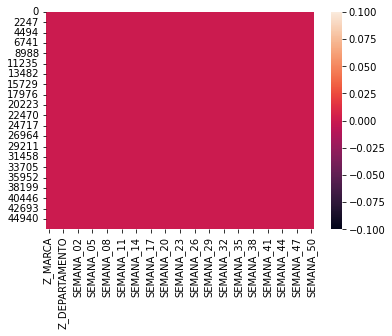

In [8]:
### Checking for nan values ###
sns.heatmap(raw_train.isna())
### Conclusion: All clean ###

<AxesSubplot:>

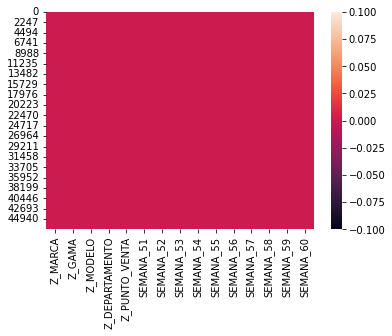

In [9]:
### Checking for nan values ###
sns.heatmap(raw_test.isna())
### Conclusion: There are 99 values instead of nan ###

In [10]:
descriptive_columns = ['Z_MARCA', 'Z_GAMA', 'Z_MODELO',
                       'Z_DEPARTAMENTO', 'Z_PUNTO_VENTA']

In [11]:
raw_train[descriptive_columns].drop_duplicates().shape
### Conclusion: 5 concatenated fields don't duplicate ###

(47173, 5)

In [12]:
[ columns_info(raw_train, raw_test, \
               column) for column in descriptive_columns]

### Conclusion: All values are both dataframes. We are going to map
### the values.

######  Z_MARCA  TRAIN INFO ####

285075a02b2679248a6b4636c3328bd3097626607c3e43c0c5498258fbfa9f29    11888
9fc7c2306f5afb4bfe47feefbd193f245633febbb1817113fdf0a768172285b5    10631
5132f94c2aebce767bd61d9e8f0d4f681d0809ca90cd2cd09be494f221367bb5     5951
09c32757a9ca408c829114503523a5e6762dd1ba2b81067ad113837c1b30188b     5005
f223faa96f22916294922b171a2696d868fd1f9129302eb41a45b2a2ea2ebbfd     2844
df853f864c74fa85acd3a25cd0afed68f1f1d0ab249e17cdb25e77569ac595a2     2364
4b1acc0002585cda1245f0e07c6f58ff0e3b5a0e8d3187fa55d6e0ed43836c1d     1317
0855cd73c3a9dc2c31a7c4dcaecfd53282238c6a457a5c771cbee045c0d9a521     1225
53c759c773f2b832ddcc61534bdb919d44e03be212241e7dad49b286afa95340     1211
f41bcffa7463b16f9fea3293a550589718777902b4406c44e3150dad7c47bc3c      936
22ea092e7643557ea91b74dea27589acac28a04fce976c577c422cd3ee1c9dc2      864
c0dd56d5b73d72cbd9a3df3f70e0df98ce15417d0f8c3a678280beb763388a4f      724
1d45ae99abcc02002be90eabecf61d0ce0613d1de5f0c37ddd7bbbd7e8198cf5      637
c25b

[None, None, None, None, None]

In [13]:
### MAPPING ENCODED VALUES INTO SIMPLER ONES ###
(raw_train, mapping_list) = mapping_encoded_columns(raw_train, descriptive_columns)
raw_test = mapping_encoded_columns(raw_test, descriptive_columns, mapping_list)

In [14]:
[ columns_info(raw_train, raw_test, \
               column) for column in descriptive_columns]
### Conclusion: Validation difference empty set() in train and test###

######  Z_MARCA  TRAIN INFO ####

MAR_1     11888
MAR_2     10631
MAR_3      5951
MAR_4      5005
MAR_5      2844
MAR_6      2364
MAR_7      1317
MAR_8      1225
MAR_9      1211
MAR_10      936
MAR_11      864
MAR_12      724
MAR_13      637
MAR_14      608
MAR_15      421
MAR_16      356
MAR_17      191
Name: Z_MARCA, dtype: int64
######  Z_MARCA  TEST INFO ####

MAR_1     11888
MAR_2     10631
MAR_3      5951
MAR_4      5005
MAR_5      2844
MAR_6      2364
MAR_7      1317
MAR_8      1225
MAR_9      1211
MAR_10      936
MAR_11      864
MAR_12      724
MAR_13      637
MAR_14      608
MAR_15      421
MAR_16      356
MAR_17      191
Name: Z_MARCA, dtype: int64
The set with the columns that have different values:  set()

##############################

######  Z_GAMA  TRAIN INFO ####

GAM_1    20785
GAM_2    12249
GAM_3     5576
GAM_4     4453
GAM_5     3719
GAM_6      390
GAM_7        1
Name: Z_GAMA, dtype: int64
######  Z_GAMA  TEST INFO ####

GAM_1    20785
GAM_2    12249
GAM_3     557

[None, None, None, None, None]

In [15]:
### MELT TABLE ###
week_cols_train = sorted(list(set(raw_train.columns)-set(descriptive_columns)))
week_cols_test = sorted(list(set(raw_test.columns)-set(descriptive_columns)))

train = pd.melt(raw_train, 
                    id_vars=descriptive_columns,
                    value_vars=week_cols_train,
                    var_name='Z_WEEK',
                    value_name='Demanda')

test = pd.melt(raw_test, 
                    id_vars=descriptive_columns,
                    value_vars=week_cols_test,
                    var_name='Z_WEEK',
                    value_name='Demanda')

test['Demanda'] = np.nan ### Replace 99 values with nan. Good practice so you do not get confused.

In [16]:
train = week_mapping(train, 'Z_WEEK', datetime.date(2021, 5, 17)) ### CREATE THE Z_WEEK_DATE
test = week_mapping(test, 'Z_WEEK', datetime.date(2022, 5, 2)) ### CREATE THE Z_WEEK_DATE

In [17]:
train.head(10)

,Z_MARCA,Z_GAMA,Z_MODELO,Z_DEPARTAMENTO,Z_PUNTO_VENTA,Z_WEEK,Demanda,Z_WEEK_DATE
0,MAR_5,GAM_3,MOD_318,DEP_12,PVENT_26,SEMANA_01,0,2021-05-17
1,MAR_3,GAM_1,MOD_305,DEP_1,PVENT_212,SEMANA_01,0,2021-05-17
2,MAR_5,GAM_3,MOD_246,DEP_1,PVENT_169,SEMANA_01,1,2021-05-17
3,MAR_1,GAM_4,MOD_286,DEP_1,PVENT_161,SEMANA_01,0,2021-05-17
4,MAR_6,GAM_4,MOD_282,DEP_1,PVENT_69,SEMANA_01,0,2021-05-17
5,MAR_1,GAM_1,MOD_291,DEP_1,PVENT_191,SEMANA_01,0,2021-05-17
6,MAR_14,GAM_5,MOD_97,DEP_16,PVENT_57,SEMANA_01,0,2021-05-17
7,MAR_14,GAM_5,MOD_97,DEP_13,PVENT_245,SEMANA_01,0,2021-05-17
8,MAR_14,GAM_5,MOD_97,DEP_10,PVENT_295,SEMANA_01,0,2021-05-17
9,MAR_14,GAM_5,MOD_97,DEP_13,PVENT_133,SEMANA_01,0,2021-05-17


In [18]:
### Extracting day, month, year for the forecasting models and EDA ###
train['Z_DAY'] = train['Z_WEEK_DATE'].map(lambda x: x.day)
train['Z_MONTH'] = train['Z_WEEK_DATE'].map(lambda x: x.month)
train['Z_YEAR'] = train['Z_WEEK_DATE'].map(lambda x: x.year)

test['Z_DAY'] = test['Z_WEEK_DATE'].map(lambda x: x.day)
test['Z_MONTH'] = test['Z_WEEK_DATE'].map(lambda x: x.month)
test['Z_YEAR'] = test['Z_WEEK_DATE'].map(lambda x: x.year)

In [19]:
train.to_csv('../dataset/train/train_converted.csv', sep = ',', index = False) ### SAVE THE NEW DATASET WITH MODELING PURPOSES
test.to_csv('../dataset/test/test_converted.csv', sep = ',', index = False) ### SAVE THE NEW DATASET WITH MODELING PURPOSES

In [20]:
### REVERSE MAPPING INTO DICIONARY LIST TO TRANSFORM INTO
### ORIGINAL ENCODED VALUES THE DESCRIPTIVE COLUMNS###
reverse_mapping = [{v: k for k, v in dictionary.items()} for dictionary in mapping_list ]

In [21]:
reverse_mapping_file = '../utils/reverse_dict_mapping_list.txt' ### FILE TO BE READED IN MODELING PIPELINE

In [22]:
with open(reverse_mapping_file, 'wb') as f:
    pickle.dump(reverse_mapping, f)

In [23]:
with open(reverse_mapping_file, 'rb') as f:
    reverse_mapping_read = pickle.load( f)

In [24]:
assert reverse_mapping_read == reverse_mapping, 'ERROR, THEY ARE NOT THE SAME DICTIONARY' 